In [19]:
library(readxl)
library(dplyr)
install.packages("corrr")
library(corrr)
library(dplyr)
library(ggplot2)
library(dplyr)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [ ]:
df <- read_excel("EMPLEADOS_PX_LIFE_LIMPIO.xlsx")
# Vi

In [21]:
head(df)
summary(df)

ID Empleado,Edad,Género,Estado civil,Nivel educativo,Especialización,Años trabajando,Compañías empleadoras,Departamento,Cargo,⋯,Satisfacción con el ambiente,Satisfacción con las relaciones,Nivel de involucración,Balance de la vida laboral,Estado de la relación laboral,Tipo de desvinculación,Razón de la desvinculación,Turnover,GrupoEdad,Satisfaccion_bucket
<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
ECU-0001,41,Femenino,Soltero,2,Ciencias de la vida,8,8,Ventas,Ejecutivo de ventas,⋯,2,1,3,1,Finalizada,Voluntaria,Dimisión,1,35-44,4
ECU-0002,49,Masculino,Casado,1,Ciencias de la vida,10,1,Investigación y desarrollo,Investigador,⋯,3,4,2,3,Activa,NA,NA,0,45-54,2
ECU-0003,37,Masculino,Soltero,2,Otras,7,6,Investigación y desarrollo,Técnico de laboratorio,⋯,4,2,2,3,Finalizada,Voluntaria,Dimisión,1,35-44,3
ECU-0004,33,Femenino,Casado,4,Ciencias de la vida,8,1,Investigación y desarrollo,Investigador,⋯,4,3,3,3,Activa,NA,NA,0,25-34,3
ECU-0005,27,Masculino,Casado,1,Medicina,6,9,Investigación y desarrollo,Técnico de laboratorio,⋯,1,4,3,3,Activa,NA,NA,0,25-34,2
ECU-0006,32,Masculino,Soltero,2,Ciencias de la vida,8,0,Investigación y desarrollo,Técnico de laboratorio,⋯,4,3,3,2,Activa,NA,NA,0,25-34,4


 ID Empleado             Edad           Género          Estado civil      
 Length:1470        Min.   : 18.00   Length:1470        Length:1470       
 Class :character   1st Qu.: 30.00   Class :character   Class :character  
 Mode  :character   Median : 36.00   Mode  :character   Mode  :character  
                    Mean   : 37.19                                        
                    3rd Qu.: 43.00                                        
                    Max.   :360.00                                        
 Nivel educativo Especialización    Años trabajando Compañías empleadoras
 Min.   :1.000   Length:1470        Min.   : 0.00   Min.   :0.000        
 1st Qu.:2.000   Class :character   1st Qu.: 6.00   1st Qu.:1.000        
 Median :3.000   Mode  :character   Median :10.00   Median :2.000        
 Mean   :2.913                      Mean   :11.28   Mean   :2.693        
 3rd Qu.:4.000                      3rd Qu.:15.00   3rd Qu.:4.000        
 Max.   :5.000                 

In [18]:
# Creem el nou dataset filtrat
df_joves <- df %>%
  filter(Edad >= 25 & Edad <= 34)

# Comprovem el resultat
summary(df_joves$Edad)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  25.00   28.00   30.00   30.14   32.00   34.00 

In [27]:
# 1. Aseguramos que la columna sea numérica (por si hay textos o NAs)
df$`Ingresos mensuales` <- as.numeric(as.character(df$`Ingresos mensuales`))

# 2. Creamos el dataset de jóvenes (25-34 años)
df_jovenes <- df[df$Edad >= 25 & df$Edad <= 34 & !is.na(df$Edad), ]

# 3. Calculamos insights básicos
media_jovenes <- mean(df_jovenes$`Ingresos mensuales`, na.rm = TRUE)
media_total <- mean(df$`Ingresos mensuales`, na.rm = TRUE)

# Mostramos resultados en consola
cat("Análisis de Ingresos Mensuales:\n")
cat("-------------------------------\n")
cat("Media del grupo 25-34 años: ", round(media_jovenes, 2), "\n")
cat("Media de toda la empresa:   ", round(media_total, 2), "\n")

Análisis de Ingresos Mensuales:
-------------------------------
Media del grupo 25-34 años:  4950.66 
Media de toda la empresa:    6565.05 


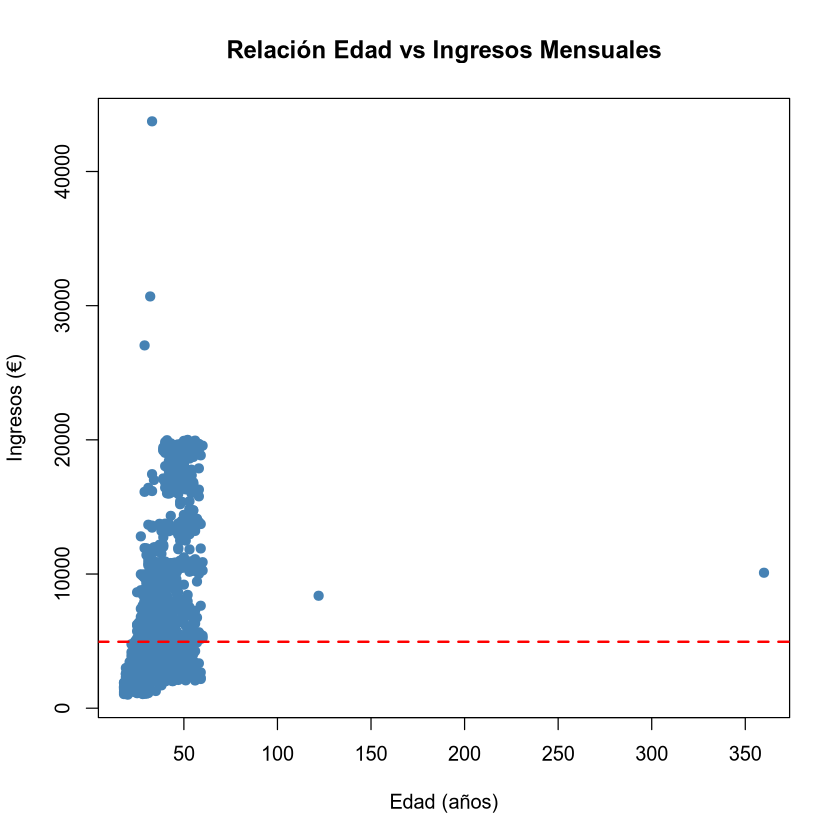

In [28]:
# Gráfico de dispersión: ¿A más edad, más ingresos?
plot(df$Edad, df$`Ingresos mensuales`,
  main = "Relación Edad vs Ingresos Mensuales",
  xlab = "Edad (años)",
  ylab = "Ingresos (€)",
  col = "steelblue",
  pch = 19
)

# Dibujamos una línea roja que cruza el promedio de los jóvenes
abline(h = media_jovenes, col = "red", lwd = 2, lty = 2)

Loading required package: corrplot

corrplot 0.95 loaded



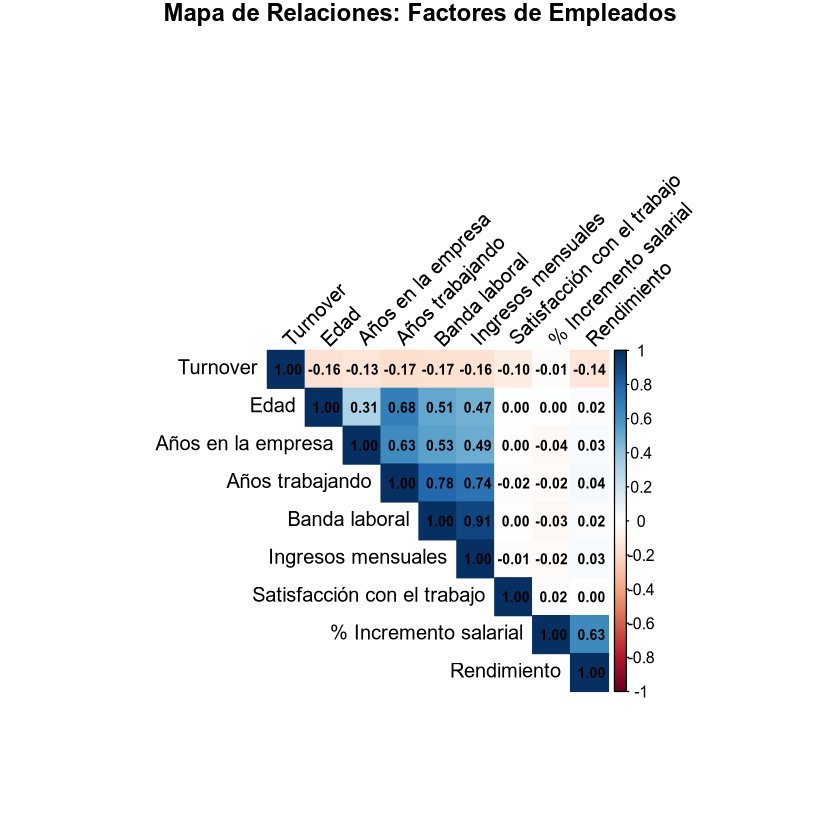

In [29]:
# 1. Limpieza rápida de datos extraños (Edad máxima 360 detectada en tu resumen)
df$Edad[df$Edad > 100] <- NA

# 2. Selección de columnas numéricas clave para el negocio
# He incluido las que más impactan en Turnover e Ingresos
cols_interes <- c(
  "Edad", "Años trabajando", "Banda laboral",
  "Ingresos mensuales", "Años en la empresa",
  "Satisfacción con el trabajo", "Turnover",
  "% Incremento salarial", "Rendimiento"
)

# Creamos un subconjunto solo con estas columnas y eliminamos filas con NAs
df_corr <- df[, cols_interes]
df_corr <- na.omit(df_corr)

# 3. Cálculo de la matriz de correlación
matriz_cor <- cor(df_corr)

# 4. Visualización (Usando corrplot si lo tienes, o un heatmap estándar de R Base)
if (!require(corrplot)) install.packages("corrplot")
library(corrplot)

corrplot(matriz_cor,
  method = "color",
  type = "upper",
  order = "hclust",
  tl.col = "black",
  tl.srt = 45,
  addCoef.col = "black", # Muestra el número de la correlación
  number.cex = 0.7,
  title = "Mapa de Relaciones: Factores de Empleados",
  mar = c(0, 0, 1, 0)
)

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


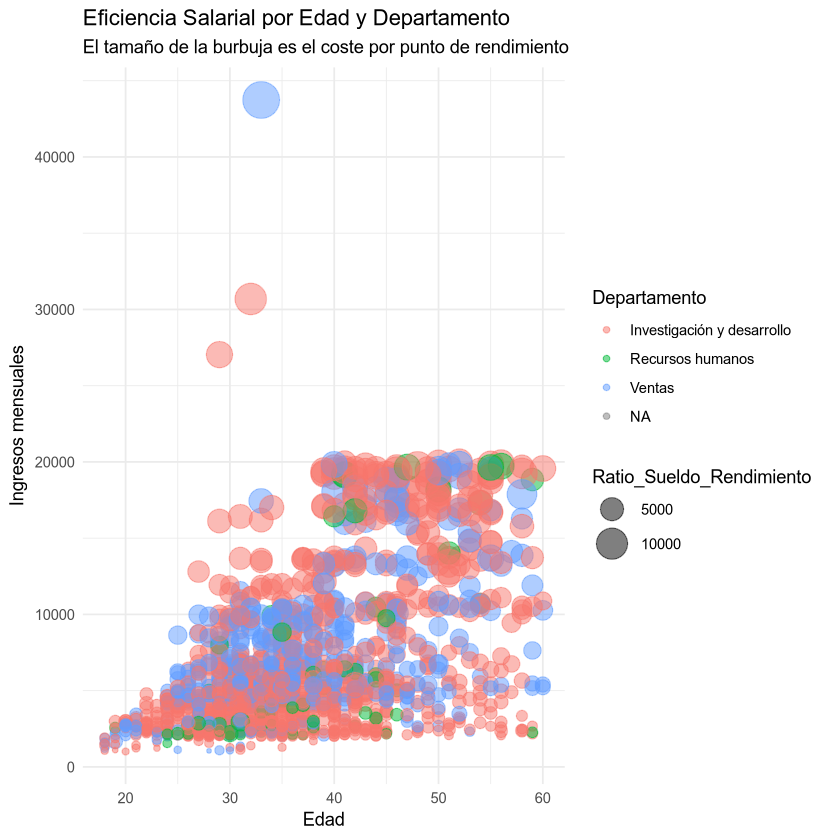

In [30]:
# Creamos el ratio
df$Ratio_Sueldo_Rendimiento <- df$`Ingresos mensuales` / df$Rendimiento

# Gráfico de burbujas (3 variables)
# X = Edad, Y = Ingresos, Tamaño = Ratio, Color = Departamento
ggplot(df[df$Edad < 100, ], aes(x = Edad, y = `Ingresos mensuales`, size = Ratio_Sueldo_Rendimiento, color = Departamento)) +
  geom_point(alpha = 0.5) +
  scale_size(range = c(1, 10)) +
  labs(
    title = "Eficiencia Salarial por Edad y Departamento",
    subtitle = "El tamaño de la burbuja es el coste por punto de rendimiento"
  ) +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


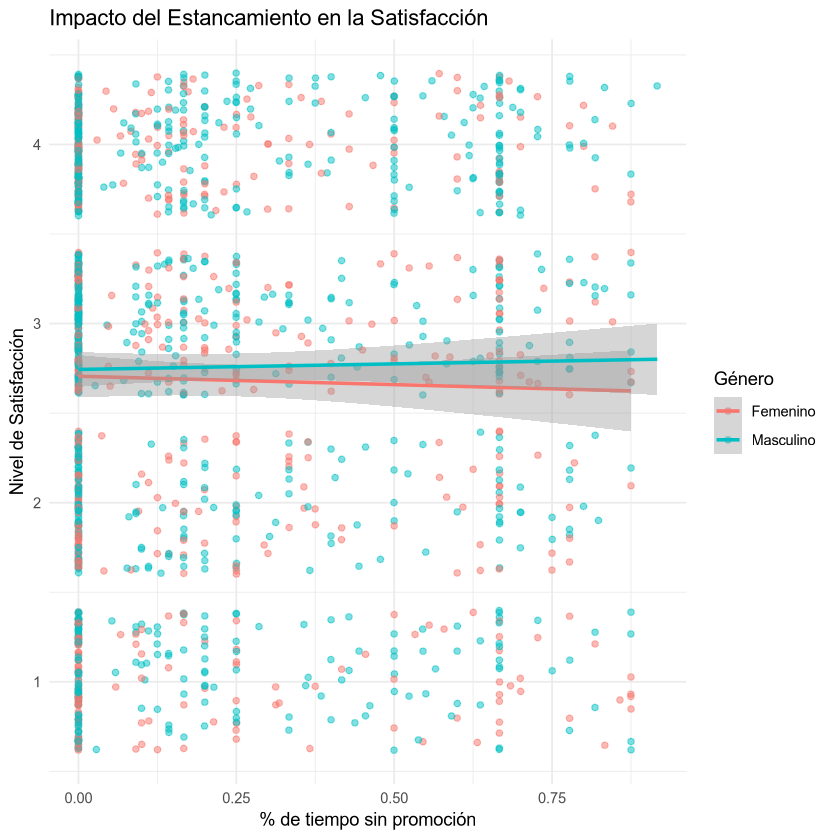

In [31]:
# Ratio de estancamiento
df$Ratio_Estancamiento <- df$`Años sin promocionar` / (df$`Años en la empresa` + 1)

# Correlación visual entre Estancamiento y Satisfacción separada por Género o Sede
ggplot(df, aes(x = Ratio_Estancamiento, y = `Satisfacción con el trabajo`, color = Género)) +
  geom_jitter(alpha = 0.5) + # Usamos jitter para evitar que los puntos se solapen
  geom_smooth(method = "lm") +
  labs(title = "Impacto del Estancamiento en la Satisfacción",
       x = "% de tiempo sin promoción", y = "Nivel de Satisfacción") +
  theme_minimal()

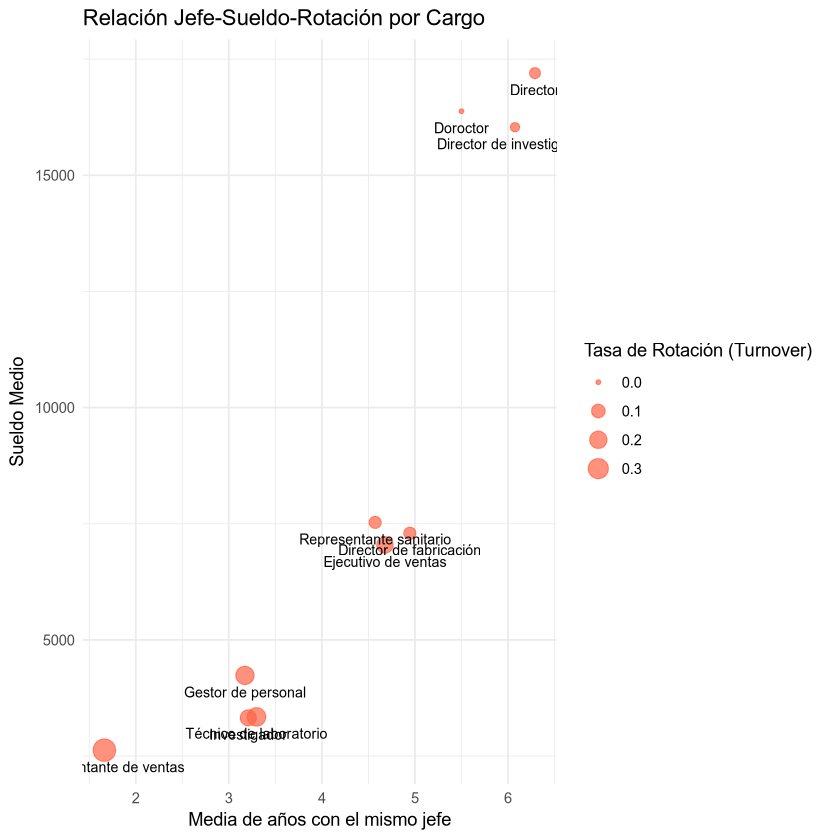

In [32]:
# Agrupamos para ver tendencias por Cargo
df_resumen <- df %>%
  group_by(Cargo) %>%
  summarise(
    Media_Jefe = mean(`Años con el mismo jefe`, na.rm = TRUE),
    Media_Sueldo = mean(`Ingresos mensuales`, na.rm = TRUE),
    Tasa_Rotacion = mean(Turnover, na.rm = TRUE)
  )

ggplot(df_resumen, aes(x = Media_Jefe, y = Media_Sueldo, size = Tasa_Rotacion, label = Cargo)) +
  geom_point(color = "tomato", alpha = 0.7) +
  geom_text(vjust = 2, size = 3) +
  labs(title = "Relación Jefe-Sueldo-Rotación por Cargo",
       x = "Media de años con el mismo jefe", 
       y = "Sueldo Medio",
       size = "Tasa de Rotación (Turnover)") +
  theme_minimal()